# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three Observable Trends:

- The vast majority of the cities that had a Max Temp above 100 were located between 20 and 40 degrees Latitude.

- The majority of cities in the analysis had Humidity of 60 percent or higher.

- In reference to Wind Speed, the majority of cities have wind speeds that did not exceed 15 mph.

In [67]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API key
import api_keys

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data_cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
# OpenWeatherMap API Key

api_key = api_keys.api_key

# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
cities_data = []

# Begin Printing to log

print("Data Retrieval Beginning")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        cities_data.append({"city":city,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading has completed 

print("Data Retrieval Complete")


Data Retrieval Beginning
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=leshukonskoye
http://api.openweathermap.org/data/2.5/weather?u

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=moses lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=marcona
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=warqla
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=81

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=tabukiniberu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=kemin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=grenville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=palabuhanratu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=mumbwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=samalaeulu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=bengkulu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=olafsvik
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=pingyi
city not found
http://api.openweathermap.org/data/2.5/weather?units=I

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=dordrecht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=namie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=warrnambool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=barra patuca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=erie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=sentyabrskiy
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=san andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=molteno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=papetoai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=chabahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=gunjur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=piripiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=hobbs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=chardara
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=cozumel
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8e

city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=aldan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=rudbar
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=sulangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508f8ec6b282c1f1f73ba78&q=volokonovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8122c1819508

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
#Creating a dataframe

cities_df = pd.DataFrame(cities_data)

#Re-ordering the columns in data frame 

cities_df = cities_df [["city","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
cities_df.head()

,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,bethel,75,93,60.79,64.40,8.05
1,clyde river,90,70,70.47,48.20,10.29
2,hobart,40,66,-42.88,48.20,9.17
3,la ronge,90,93,55.10,57.20,3.36
4,saskylakh,100,39,71.97,68.18,4.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

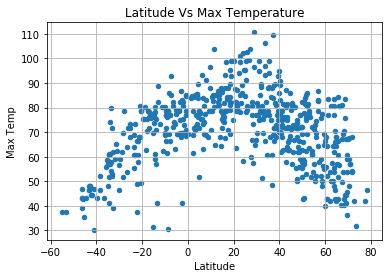

In [71]:
#Creating Latitude Vs Max Temperature Plot

cities_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

#Saving the Figure 

plt.savefig("Max_Temp_vs_Latitude.png")

#Displaying the Plot 

plt.show()

#### Latitude vs. Humidity Plot

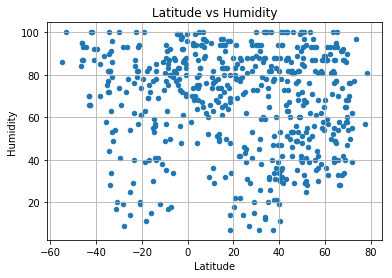

In [72]:
#Creating Latitude vs Humidity Plot

cities_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True)

#Saving the Figure 

plt.savefig("Humidity_vs_Latitude.png")

#Displaying the Plot 

plt.show()

#### Latitude vs. Cloudiness Plot

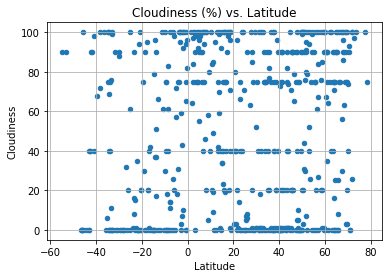

In [73]:
#Creating Cloudiness (%) vs. Latitude

cities_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True)

#Saving the Figure  

plt.savefig("Cloudiness_vs_Latitude.png")

# Display the Plot 

plt.show()

#### Latitude vs. Wind Speed Plot

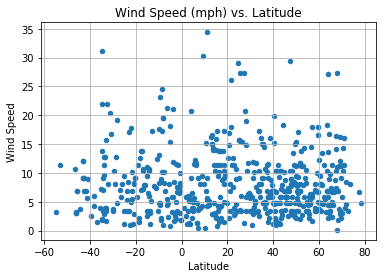

In [74]:
#Creating Wind Speed (mph) vs. Latitude Plot

cities_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True) 

#Saving the Figure

plt.savefig("Wind_Speed_vs_Latitude.png")

# Display the Plot

plt.show()

In [75]:
# save the Dataframe to csv file 

cities_df.to_csv(output_data_file,index_label ="city_id")